In [75]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

In [76]:
# Load Dataset
df = pd.read_csv("D:/2024/python/Ecommerce/Ecommerce/Data/ecommerce_dataset_updated.csv")

In [77]:
df.head(2)

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,12-11-2024
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,09-02-2024


In [78]:
# Describe the Data
df.describe()

,Price (Rs.),Discount (%),Final_Price(Rs.)
count,3660.000000,3660.000000,3660.000000
mean,254.800675,18.825137,206.906579
std,141.682621,14.731338,122.687844
min,10.090000,0.000000,5.890000
25%,134.012500,5.000000,104.512500
50%,253.845000,15.000000,199.185000
75%,377.595000,25.000000,304.117500
max,499.960000,50.000000,496.820000


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           3660 non-null   object 
 1   Product_ID        3660 non-null   object 
 2   Category          3660 non-null   object 
 3   Price (Rs.)       3660 non-null   float64
 4   Discount (%)      3660 non-null   int64  
 5   Final_Price(Rs.)  3660 non-null   float64
 6   Payment_Method    3660 non-null   object 
 7   Purchase_Date     3660 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 228.9+ KB


In [80]:
# Check Null values 
df.isnull().sum().sort_values(ascending=False)

User_ID             0
Product_ID          0
Category            0
Price (Rs.)         0
Discount (%)        0
Final_Price(Rs.)    0
Payment_Method      0
Purchase_Date       0
dtype: int64

In [81]:
# check Duplicates values in our data
df.duplicated().sum()

np.int64(0)

` In our Data we have no Null and Duplicated Values `

In [82]:
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], errors='coerce')

In [83]:
df['Year'] = df['Purchase_Date'].dt.year
df['Month'] = df['Purchase_Date'].dt.month
df['Days'] = df['Purchase_Date'].dt.day

In [84]:
df.head(2)

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date,Year,Month,Days
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,2024-12-11,2024.0,12.0,11.0
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,2024-09-02,2024.0,9.0,2.0


` We have done to extract Days, Month and Year in  Purchase_Date ` 

# VISULIZATION

# 1. Distribution of Categories
- Goal: Show the most popular product categories.

C:\Users\Muhammad Usman\AppData\Local\Temp\ipykernel_8704\2986584777.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df , x='Category' , order=df['Category'].value_counts().index, palette='viridis')


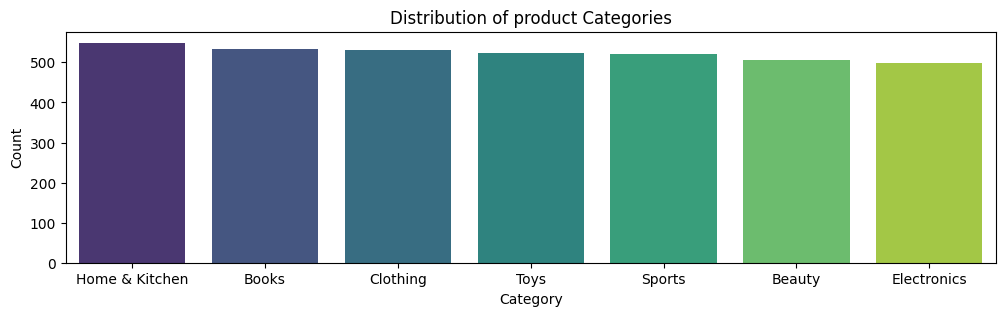

In [85]:
plt.figure(figsize=(12,3))
sns.countplot(data=df , x='Category' , order=df['Category'].value_counts().index, palette='viridis')
plt.title("Distribution of product Categories")
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

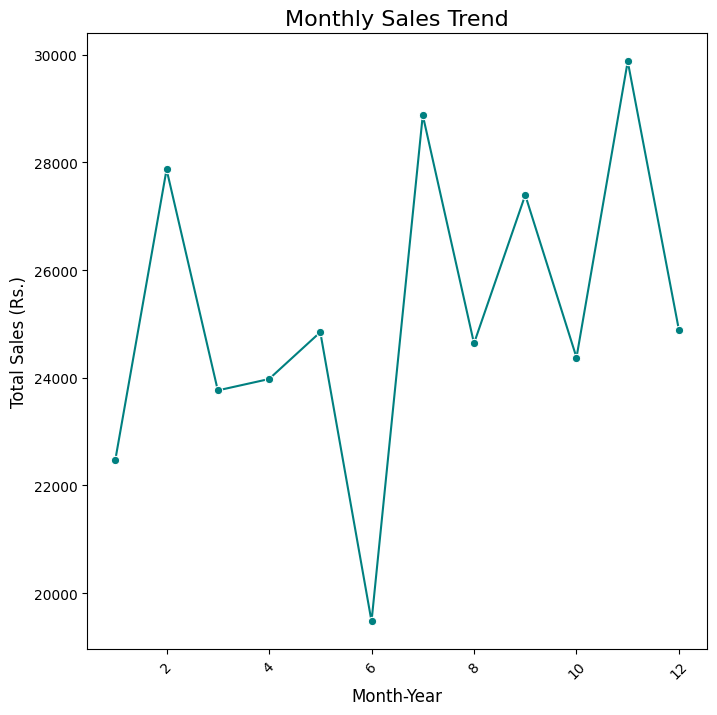

In [86]:
monthly_sales = df.groupby('Month')['Final_Price(Rs.)'].sum().reset_index()


plt.figure(figsize=(8,8))
sns.lineplot(data=monthly_sales , x='Month' , y='Final_Price(Rs.)' , marker='o', color='teal')
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Total Sales (Rs.)', fontsize=12)
plt.xticks(rotation=45)
plt.show() 

# Payment Method Distribution
- Goal: Show the proportion of each payment method.

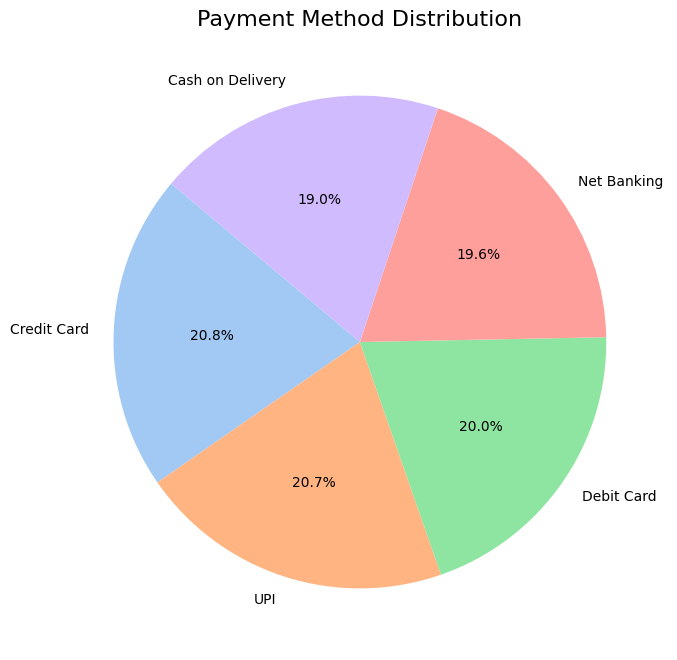

In [87]:
# Payment method distribution
payment_dist = df['Payment_Method'].value_counts()

plt.figure(figsize=(8, 8))
payment_dist.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Payment Method Distribution', fontsize=16)
plt.ylabel('')  # Remove default y-label
plt.show()


In [88]:
df_2 = pd.read_csv('./Data/ecommerce_dataset_updated.csv')

In [89]:
# Encode categorical columns
le_category = LabelEncoder()
le_payment = LabelEncoder()
df_2['Category'] = le_category.fit_transform(df_2['Category'])
df_2['Payment_Method'] = le_payment.fit_transform(df_2['Payment_Method'])

In [90]:
df_2.head(2)

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date
0,337c166f,f414122f-e,5,36.53,15,31.05,3,12-11-2024
1,d38a19bf,fde50f9c-5,2,232.79,20,186.23,3,09-02-2024


In [91]:
df_2 = df_2.drop(['User_ID' , 'Product_ID','Purchase_Date'],axis=1)

In [92]:
# Select Features and Target
X = df_2.drop(['Final_Price(Rs.)'], axis=1)
y = df_2['Final_Price(Rs.)']

In [93]:
import numpy as np
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [74]:
# Ensure that the data has the correct shape
X_train = np.random.rand(100, 256, 256, 3).astype('float32')
y_train = np.random.randint(2, size=(100, 1)).astype('float32')
X_test = np.random.rand(20, 256, 256, 3).astype('float32')
y_test = np.random.randint(2, size=(20, 1)).astype('float32')

In [94]:
# Reshape data for CNN
# Ensure that the data has the correct shape
X_train = np.random.rand(100, 256, 256, 3).astype('float32')
y_train = np.random.randint(2, size=(100, 1)).astype('float32')

In [95]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [96]:
# Step 2: Build CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

d:\2024\python\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [97]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [98]:
# Step 3: Train Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.5453 - loss: 6.0547 - val_accuracy: 0.5500 - val_loss: 1.5524
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.6531 - loss: 1.0249 - val_accuracy: 0.4500 - val_loss: 0.7322
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.4305 - loss: 0.8122 - val_accuracy: 0.5500 - val_loss: 0.7164
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.4891 - loss: 0.7496 - val_accuracy: 0.5500 - val_loss: 0.6898
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.5984 - loss: 0.6508 - val_accuracy: 0.5500 - val_loss: 0.7278
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.5352 - loss: 0.6783 - val_accuracy: 0.5500 - val_loss: 0.6913
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.6305 - loss: 0.6127 - val_accuracy: 0.5500 - val_loss: 0.6913
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9820 - loss: 0.5924 - val_accuracy: 0.5500 - val_loss: 0.7015
Epoch 9/10
3/3

In [104]:
# Ensure that the data has the correct shape
X_test = np.random.rand(20, 256, 256, 3).astype('float32')
y_test = np.random.randint(2, size=(20, 1)).astype('float32')

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.7798
Test Accuracy: 0.3500


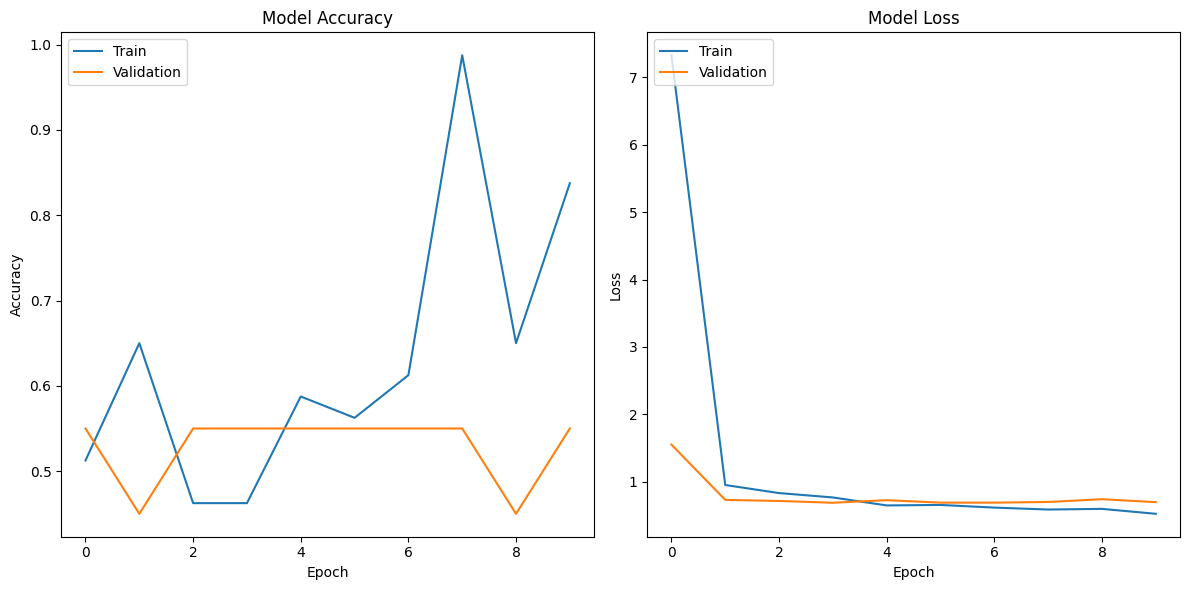

In [105]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()